In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import rubin_sim.maf as maf
from rubin_sim.maf import radar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [4]:
data_loaded = pd.read_hdf('summary.h5')

data_loaded = data_loaded.drop('opsim3_61_newschema')

In [6]:
name_dict = {'parallax  best18k': 'parallax best 18k',
            'properMotion  best18k': 'proper motion best 18k',
            'MicrolensingMetric_detect tE 5_10 days Fraction detected of total (mean)': '5-10d microlensing\ndetection',
            'MicrolensingMetric_detect tE 60_90 days Fraction detected of total (mean)': '60-90d microlensing\ndetection',
            'fO  fONv MedianNvis': 'fO N vis',
            'SNNSNMetric_reducen_sn DDF excluded Total detected': 'SNe, N',
             'SNNSNMetric_reducezlim DDF excluded Median': 'SNe, zlim',
            'Exgalm5WithCuts i band non-DD year 10 3x2ptFoM': '3x2 i-band',
            'WeakLensingNvisits gri band non-DD Median': 'WL Nvis i-band',
            'PrestoKNe_score_s  Sum': 'KNe Presto S',
            'XRBPopMetric_early_detect  Total detected': 'XRB\nearly detect',
            'Brown Dwarf, L7  VolumeSum': 'Brown Dwarf Vol',
            'DiscoveryNChances NEO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 16.000000': 'NEO bright',
            'DiscoveryNChances NEO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 22.000000': 'NEO faint',
            'DiscoveryNChances TNO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 6.000000': 'TNO',
            'DiscoveryNChances Vatira 1 quad in 1 night detection loss CumulativeCompleteness H <= 16.000000': 'Vatira'}
invert_cols = ['parallax best 18k', 'proper motion best 18k']
mag_cols = ['5-10d microlensing\ndetection', '60-90d microlensing\ndetection', 'NEO bright', 'NEO faint', 'TNO']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = data_loaded[key]
    

mag_dict = {'CoaddM5 g Median': 'g',
 'CoaddM5 i Median': 'i',
 'CoaddM5 r Median': 'r',
 'CoaddM5 u Median': 'u',
 'CoaddM5 y Median': 'y',
 'CoaddM5 z Median': 'z'}

mag_data = pd.DataFrame()
for key in mag_dict:
    mag_data[mag_dict[key]] = data_loaded[key]
    
    
    
ddf_dict = {'SNNSNMetric DD:COSMOS_reducen_sn DD:COSMOS all bands, only DDF observations Sum' : 'N SN COSMOS',
           'SNNSNMetric DD:ECDFS_reducen_sn DD:ECDFS all bands, only DDF observations Sum' : 'N SN ECDFS',
           'SNNSNMetric DD:EDFS_reducen_sn DD:EDFS all bands, only DDF observations Sum' : 'N SN EDFS',
           'SNNSNMetric DD:ELAISS1_reducen_sn DD:ELAISS1 all bands, only DDF observations Sum' : 'N SN ELAISS1',
           'SNNSNMetric DD:XMM_LSS_reducen_sn DD:XMM_LSS all bands, only DDF observations Sum' : 'N SN XMM_LSS',
           'SNNSNMetric DD:COSMOS_reducezlim DD:COSMOS all bands, only DDF observations Median': 'zlim COSMOS',
            'SNNSNMetric DD:ECDFS_reducezlim DD:ECDFS all bands, only DDF observations Median': 'zlim ECDFS',
            'SNNSNMetric DD:EDFS_reducezlim DD:EDFS all bands, only DDF observations Median': 'zlim EDFS',
            'SNNSNMetric DD:ELAISS1_reducezlim DD:ELAISS1 all bands, only DDF observations Median': 'zlim ELAISS1',
            'SNNSNMetric DD:XMM_LSS_reducezlim DD:XMM_LSS all bands, only DDF observations Median': 'zlim XMM_LSS',
            
           }

ddf_data = pd.DataFrame()
for key in ddf_dict:
    ddf_data[ddf_dict[key]] = data_loaded[key]
 

In [7]:
data

,parallax best 18k,proper motion best 18k,5-10d microlensing\ndetection,60-90d microlensing\ndetection,fO N vis,"SNe, N","SNe, zlim",3x2 i-band,WL Nvis i-band,KNe Presto S,XRB\nearly detect,Brown Dwarf Vol,NEO bright,NEO faint,TNO,Vatira
baseline2018a_newschema,0.849066,0.203946,0.0552,0.2547,763.0,1.059357e+05,2.797473e-01,3.457790e+01,401.0,22.0,465.0,191325.422813,0.8954,0.662584,0.680805,NaN
baseline_2exp_pairsmix_10yrs,0.719792,0.172640,0.0567,0.2577,889.0,1.034152e+05,2.758230e-01,3.493328e+01,477.0,21.0,731.0,210838.258440,0.9110,0.615502,0.701594,NaN
baseline_v2.0_10yrs,0.791058,0.184088,0.1580,0.4284,839.0,9.930253e+04,2.820120e-01,3.790813e+01,443.0,196.0,1879.0,168086.074111,0.9294,0.642021,0.719635,0.0039
baseline_v2.2_10yrs,0.792958,0.186345,0.1656,0.4462,830.0,1.128021e+05,2.899800e-01,3.979428e+01,440.0,189.0,1921.0,172453.127988,0.9304,0.657476,0.723913,0.0008
draft2_updated_uzy_v2.99_10yrs,0.793345,0.185786,0.1657,0.4528,791.0,1.098855e+05,2.974040e-01,3.873059e+01,421.0,163.0,1946.0,166437.978765,0.9340,0.640307,0.721724,0.0383
minion_1016_newschema,0.881744,0.239634,0.0120,0.0278,770.0,6.439795e+04,2.569878e-01,2.655592e+01,460.0,10.0,200.0,142117.832891,0.9190,0.641966,0.696997,0.0000
opsim3_61_newschema2,3.152255,0.840339,0.0033,0.0239,185.0,-1.637500e+30,-1.637500e+30,-1.637500e+30,NaN,0.0,0.0,150845.106331,0.0000,0.000000,0.000000,NaN
retro_baseline_v2.0_10yrs,0.804328,0.176701,0.0385,0.1533,848.0,9.712401e+04,2.813043e-01,3.463226e+01,449.0,128.0,619.0,179640.718155,0.9048,0.623933,0.705953,NaN


In [8]:
mag_data

,g,i,r,u,y,z
baseline2018a_newschema,26.816082,26.381714,26.900637,25.765008,24.901224,25.564653
baseline_2exp_pairsmix_10yrs,26.821019,26.332924,26.845457,25.540478,24.955630,25.744334
baseline_v2.0_10yrs,26.733479,26.218659,26.755971,25.818916,24.762720,25.510379
baseline_v2.2_10yrs,26.753646,26.290929,26.835430,25.724699,24.782743,25.581317
draft2_updated_uzy_v2.99_10yrs,26.691067,26.266481,26.796821,25.671016,24.742600,25.536234
minion_1016_newschema,26.632419,26.034175,26.604760,25.564505,24.486044,25.248525
opsim3_61_newschema2,NaN,NaN,NaN,NaN,24.889438,NaN
retro_baseline_v2.0_10yrs,26.835006,26.308518,26.850968,25.707301,24.842363,25.606168


In [9]:
ddf_data

,N SN COSMOS,N SN ECDFS,N SN EDFS,N SN ELAISS1,N SN XMM_LSS,zlim COSMOS,zlim ECDFS,zlim EDFS,zlim ELAISS1,zlim XMM_LSS
baseline2018a_newschema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baseline_2exp_pairsmix_10yrs,29.949098,-1.637500e+30,-1.637500e+30,66.104916,8.424181e+01,0.600141,-1.637500e+30,-1.637500e+30,0.596722,5.928740e-01
baseline_v2.0_10yrs,47.333916,5.217382e+00,-1.637500e+30,81.438800,7.244544e+01,0.596891,5.430270e-01,-1.637500e+30,0.593426,5.622890e-01
baseline_v2.2_10yrs,13.647867,6.881372e+00,-1.637500e+30,3.753806,-1.637500e+30,0.514987,5.774310e-01,-1.637500e+30,0.600156,-1.637500e+30
draft2_updated_uzy_v2.99_10yrs,513.473800,2.631382e+02,4.598576e+02,198.030013,2.021299e+02,0.588849,5.878243e-01,5.187110e-01,0.574497,5.596615e-01
minion_1016_newschema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opsim3_61_newschema2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retro_baseline_v2.0_10yrs,25.032699,2.192431e+00,-1.637500e+30,66.749298,6.911105e+01,0.589623,5.196760e-01,-1.637500e+30,0.570611,5.704980e-01


In [10]:
data.index

data['dates'] = pd.to_datetime(['2017-11-01', '2019-6-29',
       '2021-9-24', '2022-10-4',
       '2022-12-28', '2015-12-31',
       '2013-10-23', '2020-11-29'])

data = data.sort_values('dates')

In [11]:
data['dates']

opsim3_61_newschema2             2013-10-23
minion_1016_newschema            2015-12-31
baseline2018a_newschema          2017-11-01
baseline_2exp_pairsmix_10yrs     2019-06-29
retro_baseline_v2.0_10yrs        2020-11-29
baseline_v2.0_10yrs              2021-09-24
baseline_v2.2_10yrs              2022-10-04
draft2_updated_uzy_v2.99_10yrs   2022-12-28
Name: dates, dtype: datetime64[ns]

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_40856/179097793.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation = 90)


Text(0, 0.5, 'KNe Score')

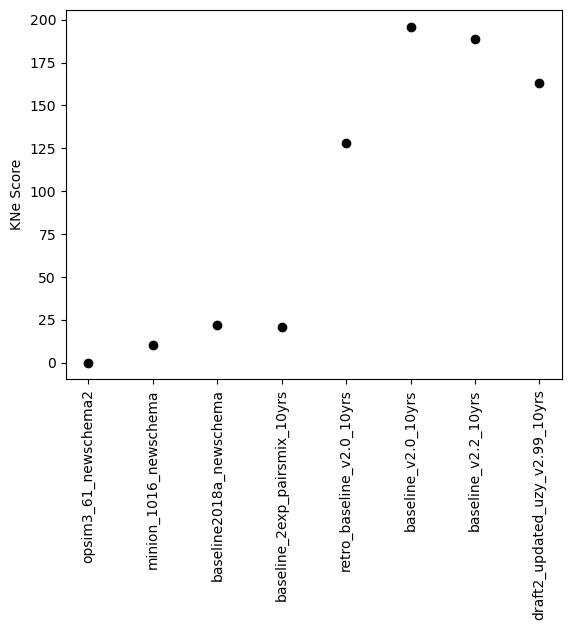

In [12]:
fig, ax = plt.subplots()

ax.plot(data['KNe Presto S'], 'ko')
ax.set_xticklabels(data.index, rotation = 90)
ax.set_ylabel('KNe Score')

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_40856/2596019822.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation = 90)


Text(0, 0.5, 'parallax best 18k')

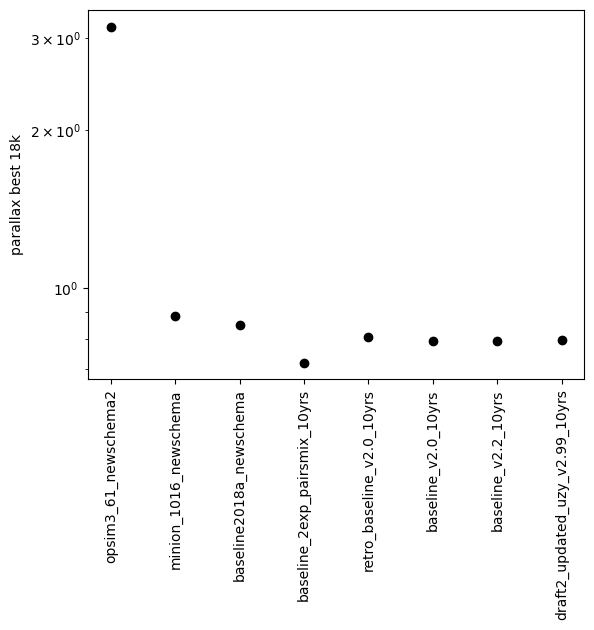

In [23]:

fig, ax = plt.subplots()

ax.semilogy(data['parallax best 18k'], 'ko')
ax.set_xticklabels(data.index, rotation = 90)
ax.set_ylabel('parallax best 18k')


/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_40856/3672268445.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation = 90)


Text(0, 0.5, '5-10d microlensing\ndetection')

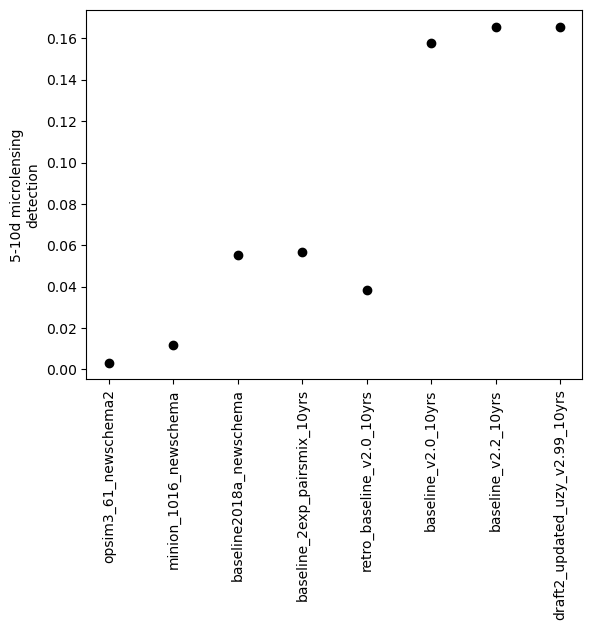

In [26]:
fig, ax = plt.subplots()

ax.plot(data['5-10d microlensing\ndetection'], 'ko')
ax.set_xticklabels(data.index, rotation = 90)
ax.set_ylabel('5-10d microlensing\ndetection')


/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_40856/2154082806.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation = 90)


Text(0, 0.5, 'proper motion best 18k')

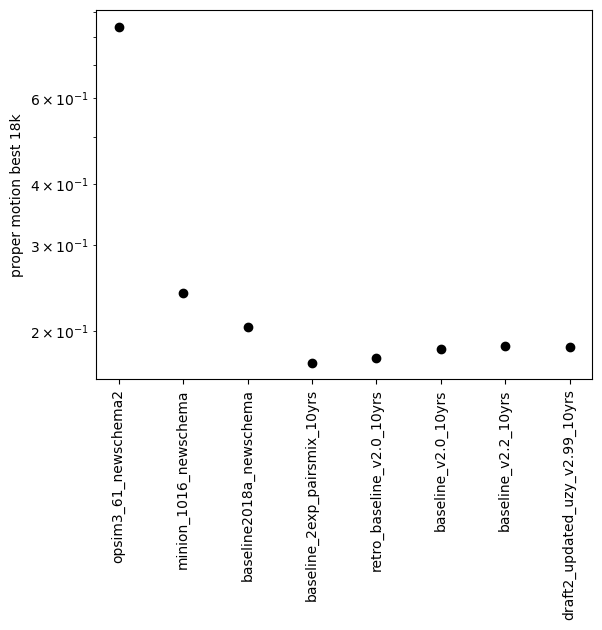

In [24]:
fig, ax = plt.subplots()

ax.semilogy(data['proper motion best 18k'], 'ko')
ax.set_xticklabels(data.index, rotation = 90)
ax.set_ylabel('proper motion best 18k')


/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_40856/3045834208.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation = 90)


Text(0, 0.5, 'Brown Dwarf Vol')

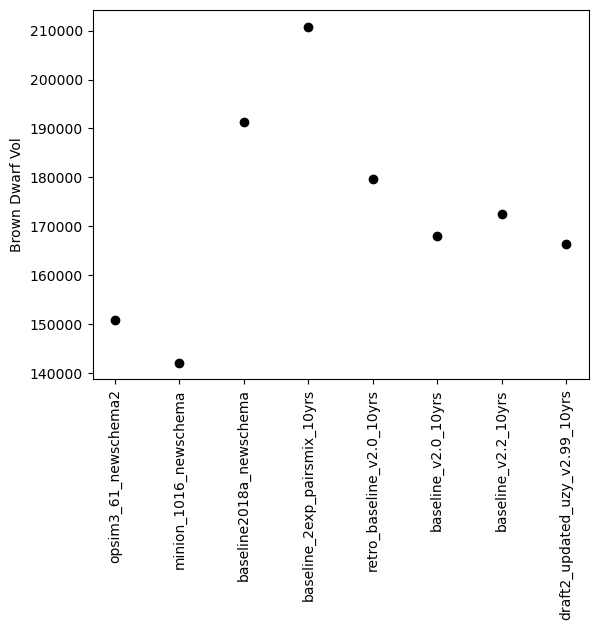

In [19]:
fig, ax = plt.subplots()

ax.plot(data['Brown Dwarf Vol'], 'ko')
ax.set_xticklabels(data.index, rotation = 90)
ax.set_ylabel('Brown Dwarf Vol')

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_40856/2515160846.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation = 90)


(0.0, 150000.0)

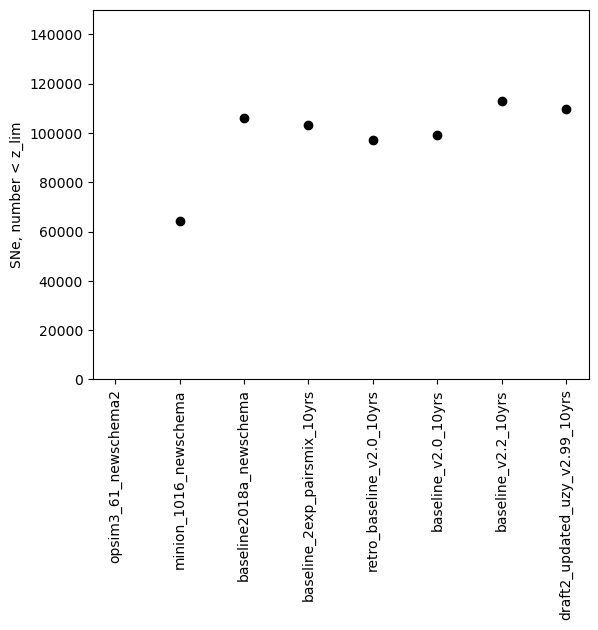

In [18]:
fig, ax = plt.subplots()

ax.plot(data['SNe, N'], 'ko')
ax.set_xticklabels(data.index, rotation = 90)
ax.set_ylabel('SNe, number < z_lim')
ax.set_ylim([0,1.5e5])

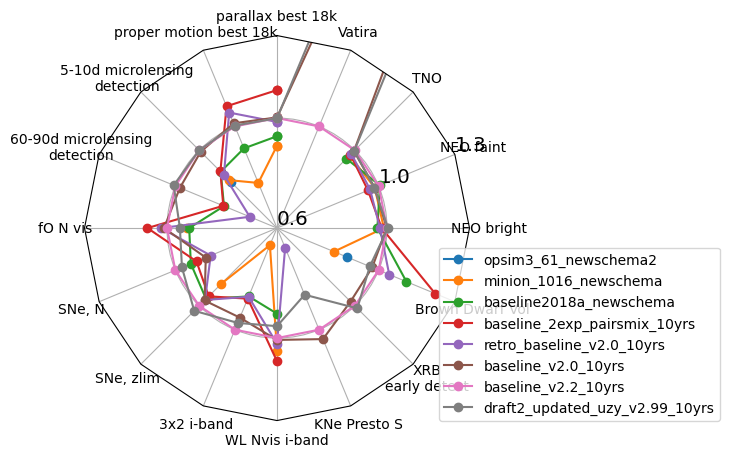

In [14]:
runs = [run for run in data.index ]
cols = data.columns.values.tolist()[:-1]

ndata = norm_df(data, runs, cols=cols,
                invert_cols=invert_cols, mag_cols = mag_cols, norm_run='baseline_v2.2_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.6, 1.0, 1.3], bbox_to_anchor=(1.65, 0))

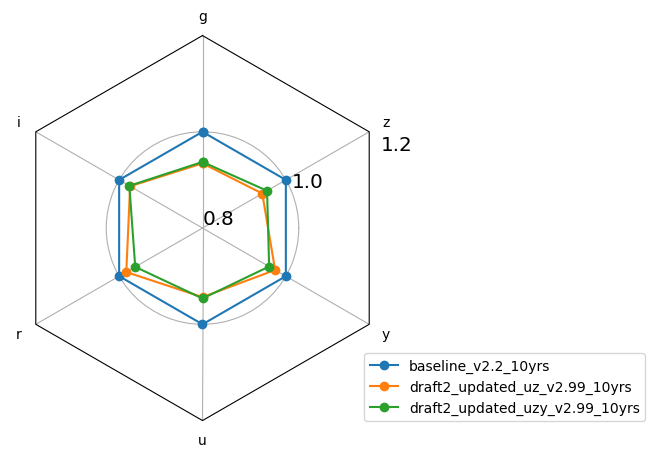

In [10]:
ndata = norm_df(mag_data, runs, cols=mag_data.columns.values.tolist(),
                mag_cols='all', norm_run='baseline_v2.2_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

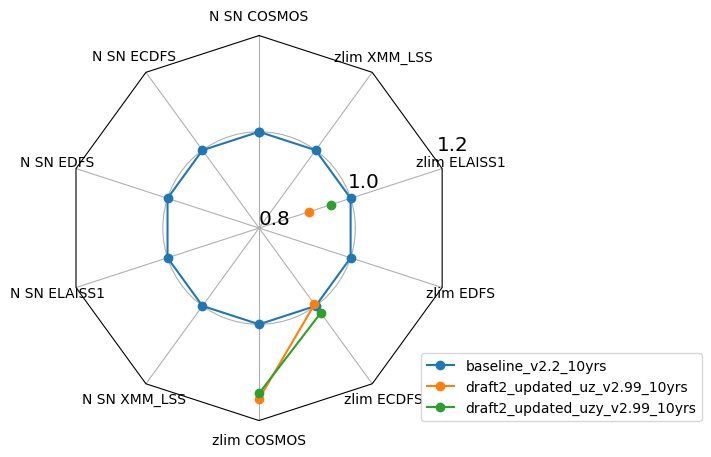

In [11]:
ndata = norm_df(ddf_data, runs, cols=ddf_data.columns.values.tolist(),
                norm_run='baseline_v2.2_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

In [12]:
ddf_data


,N SN COSMOS,N SN ECDFS,N SN EDFS,N SN ELAISS1,N SN XMM_LSS,zlim COSMOS,zlim ECDFS,zlim EDFS,zlim ELAISS1,zlim XMM_LSS
baseline_v2.2_10yrs,13.647867,6.881372,-1.637500e+30,3.753806,-1.637500e+30,0.514987,0.577431,-1.637500e+30,0.600156,-1.637500e+30
draft2_updated_uz_v2.99_10yrs,362.726856,72.383449,7.473479e+01,37.378088,6.036367e+01,0.594675,0.575080,5.267240e-01,0.546128,5.393345e-01
draft2_updated_uzy_v2.99_10yrs,513.473800,263.138228,4.598576e+02,198.030013,2.021299e+02,0.588849,0.587824,5.187110e-01,0.574497,5.596615e-01


In [13]:
data_loaded['DD:ELAISS1 NVisits all bands Median']

baseline_v2.2_10yrs                9991.0
draft2_updated_uz_v2.99_10yrs     10671.0
draft2_updated_uzy_v2.99_10yrs    11466.0
Name: DD:ELAISS1 NVisits all bands Median, dtype: float64

In [14]:
data_loaded['DD:COSMOS NVisits all bands Median']


baseline_v2.2_10yrs                9853.0
draft2_updated_uz_v2.99_10yrs     18716.5
draft2_updated_uzy_v2.99_10yrs    20739.5
Name: DD:COSMOS NVisits all bands Median, dtype: float64